In [1]:
#PARTE 1 - ENTRADA EN CALOR

#Análisis exploratorio

#Exploración Inicial
#Realizar una descripción del dataset elegido detallando:
#● Nombres y tipos de las columnas, y descripción de cada una.
#● Resumen del dataset mostrando un conjunto reducido de filas (las primeras y las
#últimas)
#● Cantidad de valores nulos por columna

#Variables cualitativas
#● Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de
#filas correspondientes a cada uno.
#○ Armar un nuevo dataframe con estos datos.
#● Para cada variable compare en un gráfico de barras la cantidad de filas pertenecientes
#a cada valor.
#○ ¿Es posible realizar este gráfico con un histograma? Explique las diferencias
#entre estos dos tipos de gráficos.

#Variables cuantitativas
#1) Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un
#nuevo dataframe con estos datos:
#● Media
#● Mediana
#● Moda
#● Primer y tercer cuartil
#● Rango
#2) Correlación de atributos
#● Explorar las variables tomándolas de a pares utilizando un gráfico scatter_matrix
#● Calcular la correlación de Pearson y graficar las correlaciones obtenidas en un
#gráfico de tipo heatmap

#3) Seleccionar un subconjunto de variables que resulten de interés y analizarlas utilizando:
#● Histogramas
#● Gráfico de violín (utilizar la librería matplotlib.pylot)
#● Boxplots
#● Density plot. Analizar si los datos presentan algún tipo de asimetría y explicar
#cuál.
#● Gráfico a elección. Seleccionar otro tipo de gráfico de una librería distinta a las
#propuestas en la materia y realizar un análisis a elección.

#Conclusiones
#Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y justificar cada
#conclusión.
#Por ejemplo:
#¿Se encontró algún tipo de comportamiento particular en alguna variable?
#¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

In [2]:
#PARTE 2 - PREGUNTAS DE INVESTIGACION

#Luego de la entrada en calor les proponemos trabajar con un nuevo set de datos (disponible
#para descargar en el siguiente link ) y les planteamos los siguientes objetivos:
#1.- Explorar el set de datos de forma libre aplicando las técnicas que consideren adecuadas
#(vistas en la materia)
#2.- A partir de la exploración realizada plantear dos preguntas de investigación que les resulten
#interesantes para formular sobre los datos propuestos. Por ejemplo, ¿existe alguna relación
#entre el género musical y alguna de las otras variables?
#3.- Elegir dos visualizaciones (como mínimo) que permitan abordar sus preguntas de
#investigación e interpretar los resultados.

## Ejemplo de estilos aplicables al Markdown de jupyter

[Link](https://jupyter.org/try-jupyter/lab/)

## Ejemplos de informes hechos en jupyter por la Universidad de Oslo

[Link](https://uio-ccse.github.io/computational-essay-showroom/examples.html)

# Trabajo Práctico 1 : Visualización de datos

### Analisis del dataset 'endorsements' con informacion acerca del respaldo politico a candidatos a presidente de los Estados Unidos desde 1980 al 2012

#### Introduccion

(explicar brevemente como funciona el respaldo politico en el marco de las elecciones presidenciales de estados unidos y de ser posible relacionarlo con las elecciones primarias, quizas agregar como va a estar estructurado el informe y los pasos a seguir en el analisis)


#### Que es el respaldo politico?

(aca si dar un poco mas de info sobre el respaldo politico intentando relacionar las columnas del dataset con la explicacion)


#### Analisis exploratorio

(aca ya empieza el tp)


#### Referencias

[Generador de citas](https://www.mybib.com/)
(usar APA7 para las referencias)

[Endorsing candidates. (n.d.). FEC.gov; Federal Election Commission](https://www.fec.gov/help-candidates-and-committees/making-disbursements-ssf-or-connected-organization/endorsing-candidates-corporation-labor-organization/)

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

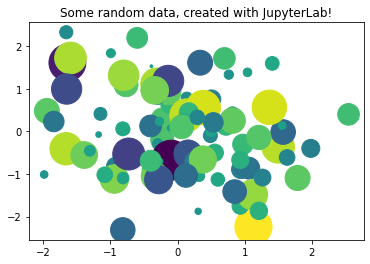

In [3]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from subprocess import check_output
import zipfile

Dataset = "endorsements-june-30"

# Will unzip the files so that you can see them..
with zipfile.ZipFile("../input/fivethirtyeight/data/"+Dataset+".zip","r") as z:
    z.extractall(".")
    
d=pd.read_csv(Dataset+"/endorsements-june-30.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
d

,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,1980,Republican,George H.W. Bush,5,6.32911,1475332.00,16.83,23.81,No
1,1980,Republican,Lowell Weicker,0,0.00000,60000.00,0.68,0.00,No
2,1980,Republican,Phil Crane,0,0.00000,2500000.00,28.53,0.76,No
3,1980,Republican,John Connally,6,7.59494,2200000.00,25.10,0.64,No
4,1980,Republican,Bob Dole,0,0.00000,253286.00,2.89,0.06,No
...,...,...,...,...,...,...,...,...,...
104,2012,Republican,Ron Paul,6,9.09091,4514165.68,14.13,10.89,No
105,2012,Republican,Mitt Romney,42,63.63640,18195222.87,56.95,52.17,Yes
106,2012,Republican,Michele Bachmann,0,0.00000,4288335.65,13.42,0.21,No
107,2012,Republican,Rick Perry,0,0.00000,0.00,0.00,0.28,No
